# Model training

The purpose of this notebook is to take advantage of the data exploration process to train a performant model.

In addition, we will iterate on some hyperparameters to better fit the data.

In [324]:
import numpy as np
import pandas as pd

import os
import sys
import inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from utils.model import FTMultilayerPerceptron
from utils.data_processing.normalizers import FTStandardScaler
from utils.data_processing.transform_labels import get_labels, labels_to_numbers
from utils.data_processing.one_hot import one_hot_encoder, one_hot_decoder
from utils.data_processing.selection import train_dev_split, kfold
from utils.metrics import *

## Download dataset

In [278]:
df_orig = pd.read_csv('../data.csv', header=None)

In [279]:
df_orig.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Set a seed

Here we set a seed to be able to reproduce those 'randomized' experiences.

In [280]:
random_state = 0

## Quick and dirty

We first are going to use all the features of the dataset and a simple implementation of the neural network (with two hidden layer as minimum 2 layers is mandatory in the subject)

### Prepare data

In [281]:
df = df_orig.drop(columns=0)

In [282]:
X = np.array(df.iloc[:, 1:]).T

In [283]:
labels = get_labels(df.iloc[:, :1])
y = labels_to_numbers(df.iloc[:, :1], labels)
y = one_hot_encoder(y, len(labels))

Now we are going to split the dataset in a training (70%) and a development (30%) sets, and normalize them.

In [325]:
X_folds, y_folds = kfold(X, y, 5, random_state=random_state)

In [286]:
scaler = FTStandardScaler()
X_train = scaler.fit_transform(X_train)
X_dev = scaler.transform(X_dev)

### Set the parameters of the neural network

In [287]:
nn_dimensions = [X_train.shape[0], 2, 2, y_train.shape[0]]

In [288]:
batch_size = X_train.shape[1]

### Training

In [ ]:
k = 5

In [ ]:
X_folds, y_folds = kfold(X, y, k, random_state=random_state)

In [ ]:
for i in range(k):
    X_train = X_folds[]

In [289]:
model = FTMultilayerPerceptron(nn_dimensions,\
    batch_size=batch_size,\
    random_state=random_state,\
    verbose=40,\
    early_stopping=True,\
    max_epoch=30000)

In [290]:
model.fit(X_train, y_train, X_dev=X_dev, y_dev=y_dev)

0.01
epoch 0/30000 - loss: 0.6931471605599453 - val_loss: 0.6928443356824678
0.01
epoch 40/30000 - loss: 0.6814299419189419 - val_loss: 0.6830860909796118
0.01
epoch 80/30000 - loss: 0.673575873687279 - val_loss: 0.6768182726235746
0.01
epoch 120/30000 - loss: 0.6683003847645652 - val_loss: 0.6728310231642755
0.01
epoch 160/30000 - loss: 0.6647475439158554 - val_loss: 0.6703275169962563
0.01
epoch 200/30000 - loss: 0.6623481781614747 - val_loss: 0.6687852606095457
0.01
epoch 240/30000 - loss: 0.6607234331569367 - val_loss: 0.6678623505778793
0.01
epoch 280/30000 - loss: 0.6596204966276094 - val_loss: 0.6673353471203735
0.01
epoch 320/30000 - loss: 0.6588701206252284 - val_loss: 0.6670584647496433
0.01
epoch 360/30000 - loss: 0.6583586128959128 - val_loss: 0.6669368453503464
0.01
epoch 400/30000 - loss: 0.6580093466642861 - val_loss: 0.6669090513913803
0.01
epoch 440/30000 - loss: 0.6577705173508025 - val_loss: 0.666935579768273
0.01
End of training:
epoch 447/30000 - loss: 0.6577372613

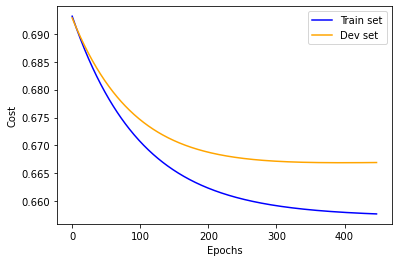

In [291]:
model.plot_learning_curve(costs_dev=True)


### Prediction on both train and dev sets

In [292]:
y_pred_train = model.predict(X_train)
y_pred_dev = model.predict(X_dev)

### Evaluate performances

In [293]:
y_truth_train = one_hot_decoder(y_train)
y_truth_dev = one_hot_decoder(y_dev)

In [294]:
print('Cost for training set = ' + str(cross_entropy_cost(y_train, model.predict_probas(X_train))))
print('Cost for      dev set = ' + str(cross_entropy_cost(y_dev, model.predict_probas(X_dev))))
print()
print('Accuracy for training set = ' + str(accuracy(y_truth_train, y_pred_train)))
print('Accuracy for      dev set = ' + str(accuracy(y_truth_dev, y_pred_dev)))

Cost for training set = 0.6577326878860759
Cost for      dev set = 0.6669437681010936

Accuracy for training set = 0.6331658291457286
Accuracy for      dev set = 0.6140350877192983


## With better feature selection

### Prepare data

In [295]:
cols_to_drop = [0]

In [296]:
df = df_orig.drop(columns=cols_to_drop)

In [297]:
X = np.array(df.iloc[:, 1:]).T

In [298]:
labels = get_labels(df.iloc[:, :1])
y = labels_to_numbers(df.iloc[:, :1], labels)
y = one_hot_encoder(y, len(labels))

In [299]:
X_train, X_dev, y_train, y_dev = train_dev_split(X, y, train_size=0.7, random_state=random_state)

In [300]:
print('In training set: {} 0 and {} 1'.format((y_train[0] == 0).sum(), (y_train[0] == 1).sum()))
print('In      dev set: {} 0 and {} 1'.format((y_dev[0] == 0).sum(), (y_dev[0] == 1).sum()))

In training set: 252 0 and 146 1
In      dev set: 105 0 and 66 1


In [301]:
scaler = FTStandardScaler()
X_train = scaler.fit_transform(X_train)
X_dev = scaler.transform(X_dev)

### Set the parameters of the neural network

In [302]:
nn_dimensions = [X_train.shape[0], 2, 2, y_train.shape[0]]

In [303]:
batch_size = X_train.shape[1]

### Training

In [304]:
model = FTMultilayerPerceptron(nn_dimensions,\
    batch_size=batch_size,\
    random_state=random_state,\
    verbose=40,\
    early_stopping=True,\
    max_epoch=30000)

In [305]:
model.fit(X_train, y_train, X_dev=X_dev, y_dev=y_dev)

0.01
epoch 0/30000 - loss: 0.6931471605599453 - val_loss: 0.6928443356824678
0.01
epoch 40/30000 - loss: 0.6814299419189419 - val_loss: 0.6830860909796118
0.01
epoch 80/30000 - loss: 0.673575873687279 - val_loss: 0.6768182726235746
0.01
epoch 120/30000 - loss: 0.6683003847645652 - val_loss: 0.6728310231642755
0.01
epoch 160/30000 - loss: 0.6647475439158554 - val_loss: 0.6703275169962563
0.01
epoch 200/30000 - loss: 0.6623481781614747 - val_loss: 0.6687852606095457
0.01
epoch 240/30000 - loss: 0.6607234331569367 - val_loss: 0.6678623505778793
0.01
epoch 280/30000 - loss: 0.6596204966276094 - val_loss: 0.6673353471203735
0.01
epoch 320/30000 - loss: 0.6588701206252284 - val_loss: 0.6670584647496433
0.01
epoch 360/30000 - loss: 0.6583586128959128 - val_loss: 0.6669368453503464
0.01
epoch 400/30000 - loss: 0.6580093466642861 - val_loss: 0.6669090513913803
0.01
epoch 440/30000 - loss: 0.6577705173508025 - val_loss: 0.666935579768273
0.01
End of training:
epoch 447/30000 - loss: 0.6577372613

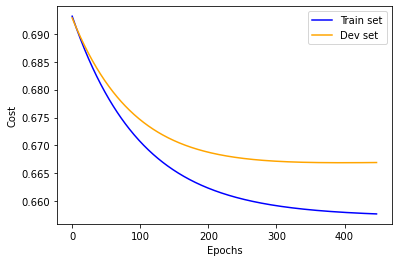

In [306]:
model.plot_learning_curve(costs_dev=True)

### Prediction on both train and dev sets

In [307]:
y_pred_train = model.predict(X_train)
y_pred_dev = model.predict(X_dev)

### Evaluate performances

In [308]:
y_truth_train = one_hot_decoder(y_train)
y_truth_dev = one_hot_decoder(y_dev)

In [309]:
print('Cost for training set = ' + str(cross_entropy_cost(y_train, model.predict_probas(X_train))))
print('Cost for      dev set = ' + str(cross_entropy_cost(y_dev, model.predict_probas(X_dev))))
print()
print('Accuracy for training set = ' + str(accuracy(y_truth_train, y_pred_train)))
print('Accuracy for      dev set = ' + str(accuracy(y_truth_dev, y_pred_dev)))

Cost for training set = 0.6577326878860759
Cost for      dev set = 0.6669437681010936

Accuracy for training set = 0.6331658291457286
Accuracy for      dev set = 0.6140350877192983


## Decrease the bias

### Increase hidden units

In [310]:
nn_dimensions = [X_train.shape[0], 4, 4, y_train.shape[0]]

### Training on both train and dev sets

In [311]:
model = FTMultilayerPerceptron(nn_dimensions,\
batch_size=batch_size,\
random_state=random_state,\
verbose=100,\
early_stopping=True,\
max_epoch=30000)

In [312]:
model.fit(X_train, y_train, X_dev=X_dev, y_dev=y_dev)

0.01
epoch 0/30000 - loss: 0.6202786033009783 - val_loss: 0.6117006054070518
0.01
epoch 100/30000 - loss: 0.4285347247483183 - val_loss: 0.42700291411397473
0.01
epoch 200/30000 - loss: 0.33204979728496 - val_loss: 0.32409617934369794
0.01
epoch 300/30000 - loss: 0.25288491637895294 - val_loss: 0.23415607316863424
0.01
epoch 400/30000 - loss: 0.20178979613364972 - val_loss: 0.17581665563685672
0.01
epoch 500/30000 - loss: 0.16872124035369424 - val_loss: 0.13955472058676527
0.01
epoch 600/30000 - loss: 0.1416580662126515 - val_loss: 0.11140699109102967
0.01
epoch 700/30000 - loss: 0.12036469975926009 - val_loss: 0.09119470542464099
0.01
epoch 800/30000 - loss: 0.10483307256139414 - val_loss: 0.0759987247098916
0.01
epoch 900/30000 - loss: 0.09432803645875393 - val_loss: 0.06613453289045783
0.01
epoch 1000/30000 - loss: 0.08634466069115564 - val_loss: 0.05936664615889519
0.01
epoch 1100/30000 - loss: 0.07994937722397515 - val_loss: 0.053812933898406294
0.01
epoch 1200/30000 - loss: 0.076

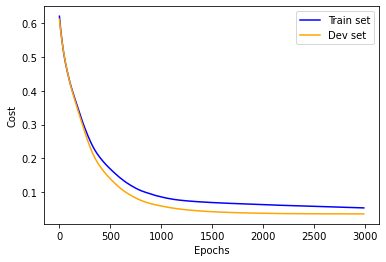

In [313]:
model.plot_learning_curve(costs_dev=True)

### Prediction on both train and dev sets

In [314]:
y_pred_train = model.predict(X_train)
y_pred_dev = model.predict(X_dev)

### Evaluate performances

In [315]:
y_truth_train = one_hot_decoder(y_train)
y_truth_dev = one_hot_decoder(y_dev)

In [316]:
print('Cost for training set = ' + str(cross_entropy_cost(y_train, model.predict_probas(X_train))))
print('Cost for      dev set = ' + str(cross_entropy_cost(y_dev, model.predict_probas(X_dev))))
print()
print('Accuracy for training set = ' + str(accuracy(y_truth_train, y_pred_train)))
print('Accuracy for      dev set = ' + str(accuracy(y_truth_dev, y_pred_dev)))

Cost for training set = 0.05383384774482361
Cost for      dev set = 0.036053228791652785

Accuracy for training set = 0.9874371859296482
Accuracy for      dev set = 0.9941520467836257


## Avoid possible variance

### Set the parameters of the neural network

We are going to use a dropout technique.

In [317]:
nn_dimensions = [X_train.shape[0], 5, 5, y_train.shape[0]]

### Training on both train and dev sets

In [318]:
model = FTMultilayerPerceptron(nn_dimensions,\
batch_size=batch_size,\
random_state=random_state,\
verbose=100,\
early_stopping=True,\
max_epoch=30000)

In [319]:
model.fit(X_train, y_train, X_dev=X_dev, y_dev=y_dev)

0.01
epoch 0/30000 - loss: 0.6132597518455138 - val_loss: 0.6136048289563936
0.01
epoch 100/30000 - loss: 0.28242046568272255 - val_loss: 0.29252771736397276
0.01
epoch 200/30000 - loss: 0.20712374945252565 - val_loss: 0.20137165047079578
0.01
epoch 300/30000 - loss: 0.17715449723190557 - val_loss: 0.16307523183351255
0.01
epoch 400/30000 - loss: 0.15993622817257605 - val_loss: 0.14313777723574636
0.01
epoch 500/30000 - loss: 0.1470798529849858 - val_loss: 0.12986862299285393
0.01
epoch 600/30000 - loss: 0.13578136360404872 - val_loss: 0.11984185173852932
0.01
epoch 700/30000 - loss: 0.12682983032044542 - val_loss: 0.11010289502813378
0.01
epoch 800/30000 - loss: 0.11797434659586914 - val_loss: 0.10159899416368902
0.01
epoch 900/30000 - loss: 0.10987951273875644 - val_loss: 0.09494882707598362
0.01
epoch 1000/30000 - loss: 0.10204706040262228 - val_loss: 0.08935922793890659
0.01
epoch 1100/30000 - loss: 0.09401617209236715 - val_loss: 0.08360268546372304
0.01
epoch 1200/30000 - loss: 0

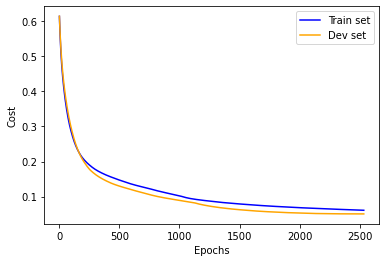

In [320]:
model.plot_learning_curve(costs_dev=True)

### Prediction on both train and dev sets

In [321]:
y_pred_train = model.predict(X_train)
y_pred_dev = model.predict(X_dev)

### Evaluate performances

In [322]:
y_truth_train = one_hot_decoder(y_train)
y_truth_dev = one_hot_decoder(y_dev)

In [323]:
print('Cost for training set = ' + str(cross_entropy_cost(y_train, model.predict_probas(X_train))))
print('Cost for      dev set = ' + str(cross_entropy_cost(y_dev, model.predict_probas(X_dev))))
print()
print('Accuracy for training set = ' + str(accuracy(y_truth_train, y_pred_train)))
print('Accuracy for      dev set = ' + str(accuracy(y_truth_dev, y_pred_dev)))

Cost for training set = 0.06115129338884965
Cost for      dev set = 0.05077889584704743

Accuracy for training set = 0.9849246231155779
Accuracy for      dev set = 0.9766081871345029
